In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils.mapping import mapDataframeToGrid

In [2]:
df = pd.read_pickle('../../data/2018_df.pkl')
df["month"] = df["time_counter"].apply(lambda x: x.month)
df = df[df["month"] == 1]

In [ ]:
# Columns to map
features = [
    'SST', 'SAL', 'ice_frac', 'mixed_layer_depth',
    'heat_flux_down', 'water_flux_up', 'stress_X', 'stress_Y',
    'currents_X', 'currents_Y', 'nav_lat', 'nav_lon', 'tmask'
]



grid_data = mapDataframeToGrid(df, features)

# Example: Accessing grid data for a specific feature (e.g., SST)
lat_diff_grid = grid_data[:, :, features.index('nav_lat')]
lon_diff_grid = grid_data[:, :, features.index('nav_lon')]

print(lat_diff_grid.shape)

# Create an array representing row indices
row_indices = np.arange(lat_diff_grid.shape[0])
row_indices = row_indices.reshape(-1, 1)-74.5
column_indices = np.arange(lat_diff_grid.shape[1]) -179.5

# Compute differences
lat_diff_grid = lat_diff_grid - row_indices
lon_diff_grid = lon_diff_grid - column_indices



diff_grid = np.sqrt(lat_diff_grid**2 + lon_diff_grid**2)

mean_val = np.mean(diff_grid)
std_val = np.std(diff_grid)
min_val = np.min(diff_grid)
max_val = np.max(diff_grid)

print(f"Mean: {mean_val}")
print(f"Standard Deviation: {std_val}")
print(f"Min value: {min_val}")
print(f"Max value: {max_val}")

(150, 360)
Mean: 0.05124404032718945
Standard Deviation: 0.037010166022148294
Min value: 6.3478946685791016e-06
Max value: 0.2083981992432842


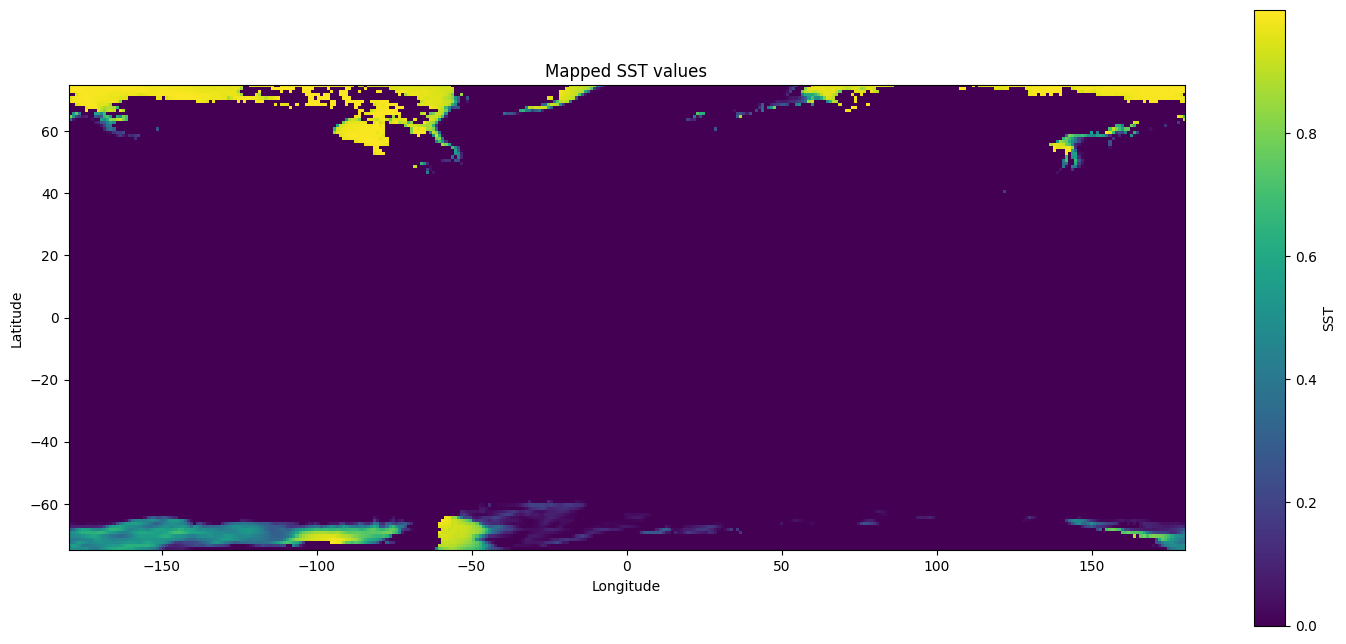

In [4]:
plt.figure(figsize=(18, 8))
# plt.imshow(grid_data, vmin=0, vmax=0.6, extent=(-180, 180, -77, 90), origin='lower')
plt.imshow(grid_data[:,:,2], extent=(-180, 180, -75, 75), origin='lower')
# plt.imshow(grid_data[:,:,0], vmin=0, vmax=0.6, extent=(-180, 180, -75, 75), origin='lower')
plt.colorbar(label='SST')
plt.title('Mapped SST values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

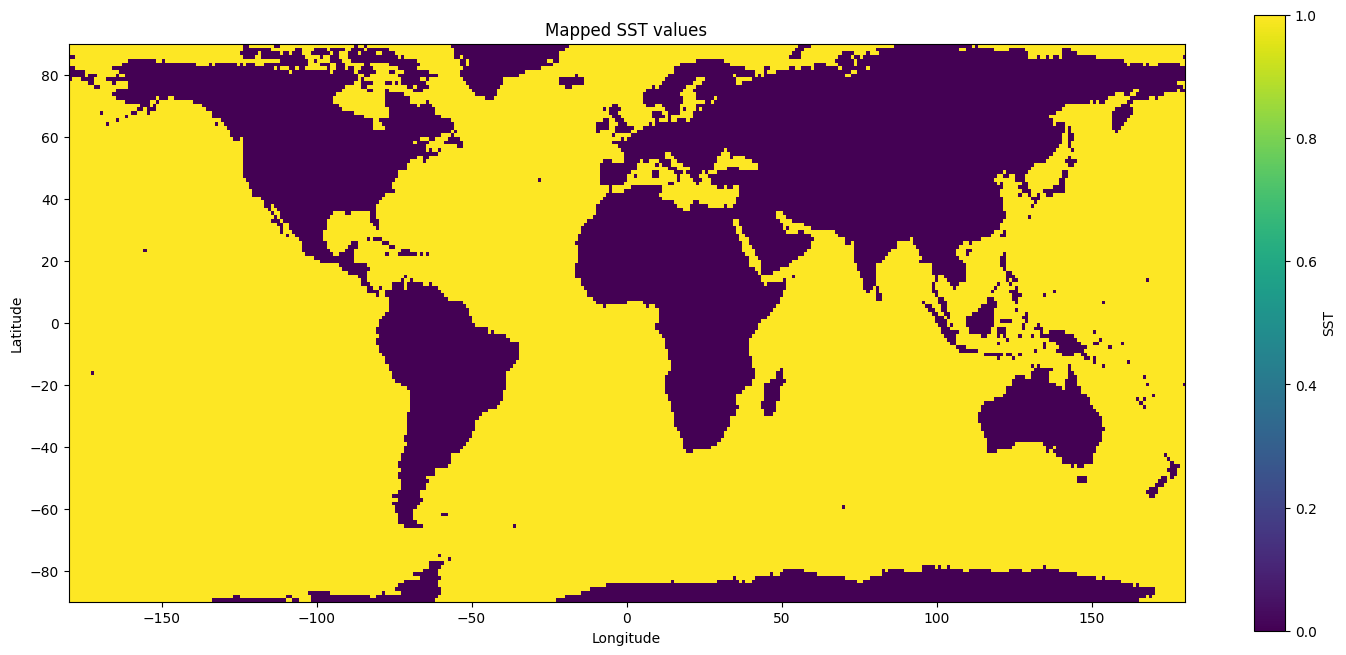

In [10]:
plt.figure(figsize=(18, 8))
# plt.imshow(grid_data, vmin=0, vmax=0.6, extent=(-180, 180, -77, 90), origin='lower')
plt.imshow(grid_data[:,:,12], extent=(-180, 180, -90, 90), origin='lower')
# plt.imshow(grid_data[:,:,0], vmin=0, vmax=0.6, extent=(-180, 180, -75, 75), origin='lower')
plt.colorbar(label='SST')
plt.title('Mapped SST values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()